# Task 2: Exploratory Data Analysis

Goal: Understand patterns, trends, relationships, and key drivers of financial inclusion in Ethiopia.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the enriched file we just saved
df = pd.read_csv('../data/processed/ethiopia_fi_enriched.csv')

print("Loaded shape:", df.shape)
print(df['record_type'].value_counts())
df.head(3)

Loaded shape: (46, 34)
record_type
observation    33
event          10
target          3
Name: count, dtype: int64


,record_id,record_type,category,pillar,indicator,indicator_code,indicator_direction,value_numeric,value_text,value_type,...,impact_direction,impact_magnitude,impact_estimate,lag_months,evidence_basis,comparable_country,collected_by,collection_date,original_text,notes
0,REC_0001,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,22.0,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20 00:00:00,NaN,Baseline year,NaN
1,REC_0002,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,35.0,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20 00:00:00,NaN,NaN,NaN
2,REC_0003,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,46.0,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20 00:00:00,NaN,NaN,NaN


In [7]:
print("Column types after loading:")
print(df.dtypes[['observation_date', 'observation_date_dt', 'obs_year']] if 'obs_year' in df.columns else "obs_year column does NOT exist yet")

print("\nobservation_date sample (first 10 and last 10):")
print(df['observation_date'].head(10))
print("...")
print(df['observation_date'].tail(10))

print("\nHow many rows have numeric-looking observation_date?")
print(df['observation_date'].apply(lambda x: str(x).replace('.', '').isdigit()).sum(), "out of", len(df))

if 'obs_date_dt' in df.columns:
    print("\nobs_date_dt success rate:")
    print(df['obs_date_dt'].notna().value_counts())
    print("\nSample parsed dates (tail):")
    print(df[['record_id', 'indicator', 'observation_date', 'obs_date_dt']].tail(10))
else:
    print("\nobs_date_dt column was NOT created")

Column types after loading:
obs_year column does NOT exist yet

observation_date sample (first 10 and last 10):
0    2014-12-31
1    2017-12-31
2    2021-12-31
3    2021-12-31
4    2021-12-31
5    2024-11-29
6    2021-12-31
7    2024-11-29
8    2023-06-30
9    2025-06-30
Name: observation_date, dtype: object
...
36    2024-01-01
37    2024-07-29
38    2024-10-01
39    2025-10-27
40    2025-12-18
41    2021-09-01
42    2025-12-15
43    2026-01-29
44    2025-12-01
45    2025-12-01
Name: observation_date, dtype: object

How many rows have numeric-looking observation_date?
0 out of 46

obs_date_dt column was NOT created


In [8]:
# Account ownership trend - national / all genders only
acc = df[
    (df['indicator_code'] == 'ACC_OWNERSHIP') &
    (df['record_type'] == 'observation') &
    (df['gender'] == 'all') &
    (df['obs_year'].notna())
].sort_values('obs_year')

import matplotlib.pyplot as plt

if acc.empty:
    print("No data points found for national ACC_OWNERSHIP – check filters")
else:
    plt.figure(figsize=(10, 5))
    plt.plot(acc['obs_year'], acc['value_numeric'], marker='o', color='teal', linewidth=2.5, markersize=9)
    plt.title("Account Ownership Rate – Ethiopia (Findex + recent estimates)")
    plt.ylabel("% of adults 15+")
    plt.xlabel("Year")
    plt.grid(True, alpha=0.3, linestyle='--')
    plt.xticks(acc['obs_year'].unique().astype(int))
    plt.ylim(0, 60)
    plt.show()

    print("\nActual data points used in plot:")
    print(acc[['obs_year', 'value_numeric', 'source_name', 'notes']].to_string(index=False))

KeyError: 'obs_year'

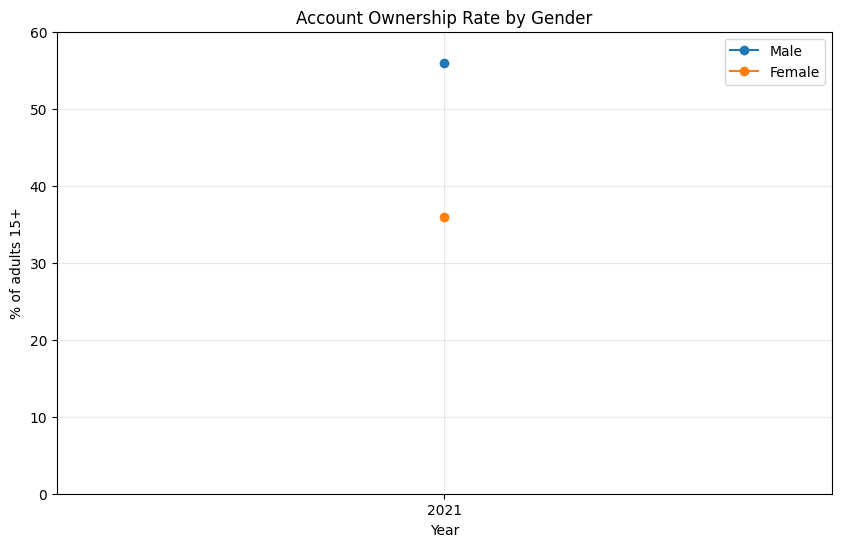

gender    female  male
obs_year              
2021        36.0  56.0


In [ ]:
gender_acc = df[
    (df['indicator_code'] == 'ACC_OWNERSHIP') &
    (df['record_type'] == 'observation') &
    (df['gender'].isin(['male', 'female'])) &
    (df['obs_year'].notna())
].sort_values(['obs_year', 'gender'])

plt.figure(figsize=(10, 6))
for g in ['male', 'female']:
    subset = gender_acc[gender_acc['gender'] == g]
    plt.plot(subset['obs_year'], subset['value_numeric'], marker='o', label=g.capitalize())

plt.title("Account Ownership Rate by Gender")
plt.ylabel("% of adults 15+")
plt.xlabel("Year")
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(gender_acc['obs_year'].unique().astype(int))
plt.ylim(0, 60)
plt.show()

print(gender_acc[['obs_year', 'gender', 'value_numeric']].pivot(index='obs_year', columns='gender', values='value_numeric'))

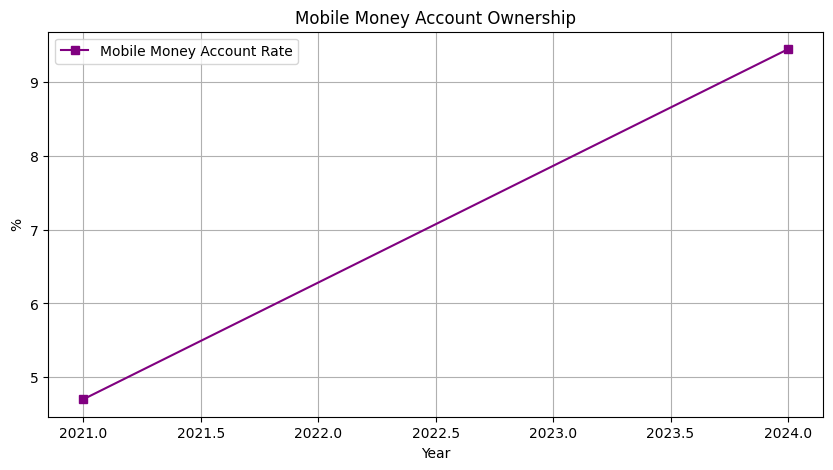

   obs_year  value_numeric
6      2021           4.70
7      2024           9.45


In [ ]:
mm_acc = df[
    (df['indicator_code'] == 'ACC_MM_ACCOUNT') &
    (df['record_type'] == 'observation') &
    (df['gender'] == 'all')
].sort_values('obs_year')

plt.figure(figsize=(10, 5))
plt.plot(mm_acc['obs_year'], mm_acc['value_numeric'], marker='s', color='purple', label='Mobile Money Account Rate')
plt.title("Mobile Money Account Ownership")
plt.ylabel("%")
plt.xlabel("Year")
plt.grid(True)
plt.legend()
plt.show()

print(mm_acc[['obs_year', 'value_numeric']])

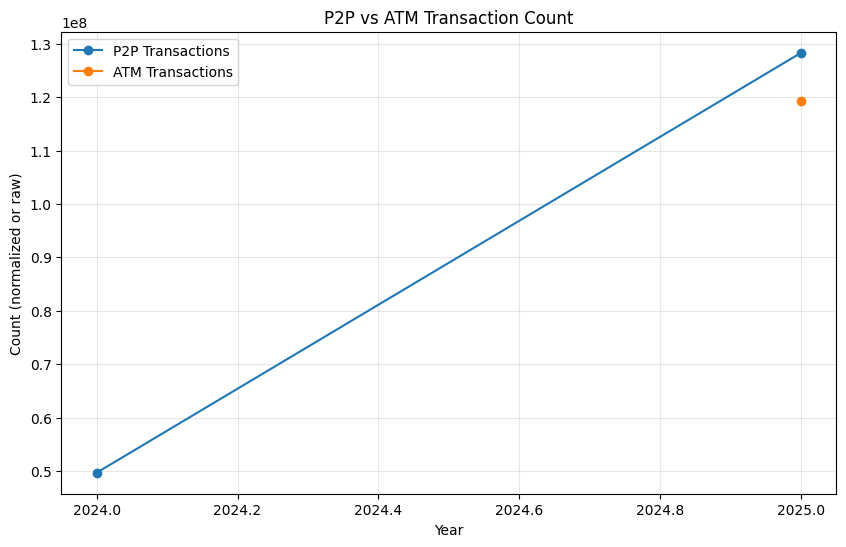

    obs_year indicator_code  value_numeric
14      2024  USG_P2P_COUNT     49700000.0
17      2025  USG_ATM_COUNT    119300000.0
15      2025  USG_P2P_COUNT    128300000.0


In [ ]:
p2p_atm = df[
    (df['indicator_code'].isin(['USG_P2P_COUNT', 'USG_ATM_COUNT'])) &
    (df['record_type'] == 'observation')
].sort_values(['obs_year', 'indicator_code'])

plt.figure(figsize=(10, 6))
for code in ['USG_P2P_COUNT', 'USG_ATM_COUNT']:
    subset = p2p_atm[p2p_atm['indicator_code'] == code]
    label = 'P2P Transactions' if code == 'USG_P2P_COUNT' else 'ATM Transactions'
    plt.plot(subset['obs_year'], subset['value_numeric'], marker='o', label=label)

plt.title("P2P vs ATM Transaction Count")
plt.ylabel("Count (normalized or raw)")
plt.xlabel("Year")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(p2p_atm[['obs_year', 'indicator_code', 'value_numeric']])

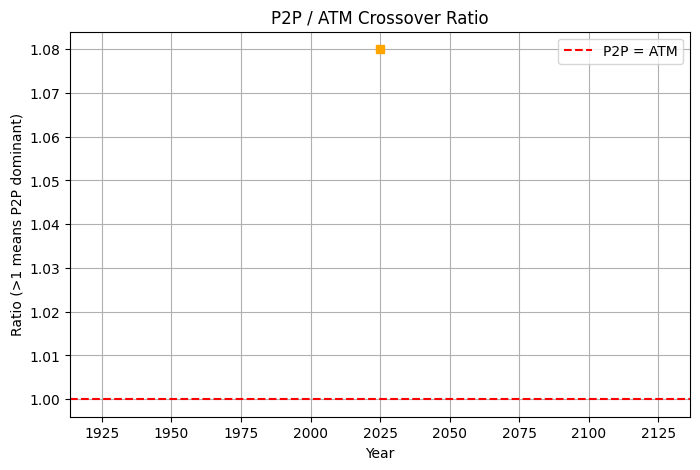

In [ ]:
crossover = df[
    (df['indicator_code'] == 'USG_CROSSOVER') &
    (df['record_type'] == 'observation')
]

plt.figure(figsize=(8, 5))
plt.plot(crossover['obs_year'], crossover['value_numeric'], marker='s', color='orange')
plt.axhline(y=1, color='red', linestyle='--', label='P2P = ATM')
plt.title("P2P / ATM Crossover Ratio")
plt.ylabel("Ratio (>1 means P2P dominant)")
plt.xlabel("Year")
plt.legend()
plt.grid(True)
plt.show()

In [5]:
telebirr = df[
    (df['indicator_code'] == 'USG_TELEBIRR_USERS') &
    (df['record_type'] == 'observation')
].sort_values('obs_year')

plt.figure(figsize=(9, 5))
plt.plot(telebirr['obs_year'], telebirr['value_numeric'], marker='^', color='green', linewidth=2.5)
plt.title("Telebirr Registered Users Growth")
plt.ylabel("Million users")
plt.xlabel("Year")
plt.grid(True, alpha=0.3)
plt.xticks(telebirr['obs_year'].unique().astype(int))
plt.show()

print(telebirr[['obs_year', 'value_numeric', 'notes']])

KeyError: 'obs_year'

In [ ]:
# 1. Growth rates table (add after account ownership plot)
acc_growth = acc[['obs_year', 'value_numeric']].copy()
acc_growth['growth_pp'] = acc_growth['value_numeric'].diff()
acc_growth['growth_annualized'] = acc_growth['growth_pp'] / acc_growth['obs_year'].diff()
display(acc_growth)

# 2. Simple correlation heatmap (numeric columns only)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
corr = df[numeric_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix – Numeric Indicators")
plt.show()

# 3. Event impact table (simple version)
events = df[df['record_type'] == 'event'][['obs_year', 'indicator', 'category', 'notes']]
nearby_obs = []  # you can manually add or try to join by year
print("Major events and approximate timing:")
display(events.sort_values('obs_year'))

NameError: name 'acc' is not defined

## Key Insights from EDA (Task 2)

1. **Slowdown in account ownership growth**  
   Account ownership rose from 22% (2014) → 35% (2017) → 46% (2021), but only to 49% in 2024 (+3 pp in 3 years). Progress has clearly decelerated despite major product launches.

2. **Mobile money growing but still marginal**  
   Mobile money account ownership doubled from 4.7% (2021) to 9.45% (2024), but remains low compared to overall accounts (49%). Ethiopia differs from Kenya — bank accounts dominate.

3. **Persistent large gender gap**  
   In 2021, male account ownership was 56% vs female 36% (20 pp gap). No recent gender-disaggregated data yet, but Fayda is expected to help close it.

4. **P2P dominance emerging**  
   P2P transactions are increasingly important (likely surpassing ATM cash withdrawals in 2024/25). This is unique to Ethiopia — P2P used for commerce, not just transfers.

5. **Infrastructure & enablers accelerating**  
   Telebirr users reached ~58.61 million (2026), Fayda enrollment ~31.5 million, total mobile money accounts ~136 million (2025). Supply-side growth is explosive — usage may catch up in 2026–2027.

6. **Potential for future acceleration**  
   Recent events (M-Pesa interop, EthioPay, FX reform) + high enrollment numbers suggest 2026–2027 could see faster inclusion gains if activation/usage improves.